Reference: 
    
http://www3.canisius.edu/~yany/python/Python4DataAnalysis.pdf

In [1]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from IPython.display import HTML
from IPython.display import Image
%matplotlib inline

In [2]:
# pull in data
SeattleDrug=pd.read_csv(os.getcwd()+'/SeattleDrug.csv')

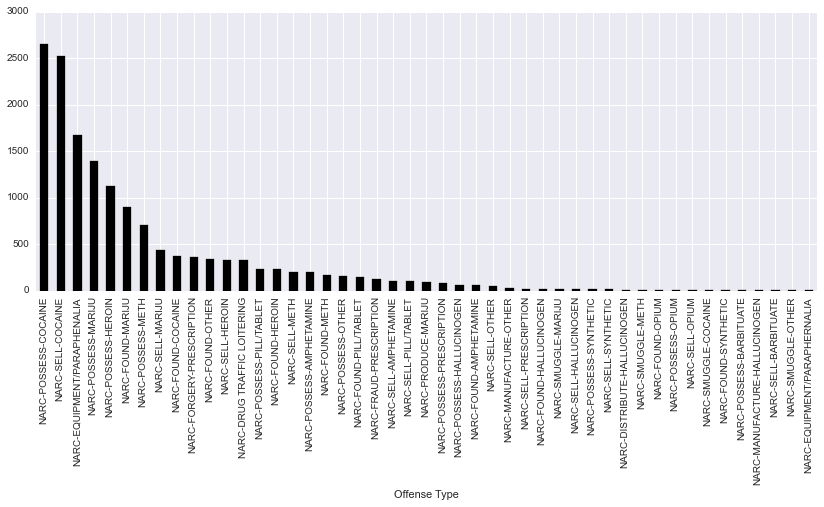

In [3]:
types=SeattleDrug.groupby('Offense Type').size()
types.sort(ascending=False)
types.plot(kind='bar',figsize=(14,5),color='k')

In [5]:
SeattleDrug.loc[0,'Offense Type']

'NARC-DISTRIBUTE-HALLUCINOGEN'

Precint de-coder:
    
http://www.seattle.gov/police/maps/precinct_map.htm

In [6]:
SeattleDrug.head(3)

,���RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,1109827,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,NaN,4XX BLOCK OF PINE ST,M,M2,8100.2001,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014
1,453925,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,NaN,4XX BLOCK OF PINE ST,M,M2,8100.2000,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014
2,106121,2013387978,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/25/13 21:04,10/25/13 19:07,NaN,10XX BLOCK OF OCCIDENTAL AV S,K,K2,9300.2031,-122.333269,47.593836,"(47.5938359, -122.333268691)",10,2013


In [ ]:
dic={''}

In [7]:
SeattleDrug.groupby('District/Sector').size()

District/Sector
99      93
B      420
C      437
D     1111
E     1371
F      397
G      870
J      267
K     3310
L      422
M     3094
N      623
O      559
Q      263
R      552
S      593
U      657
W      235
dtype: int64

In [10]:
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('COCAINE'),'Offense Type']='COKE'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('MARIJU'),'Offense Type']='WEED'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('METH'),'Offense Type']='METH'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('HEROIN'),'Offense Type']='HEROIN'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('OPIUM'),'Offense Type']='OPIUM'

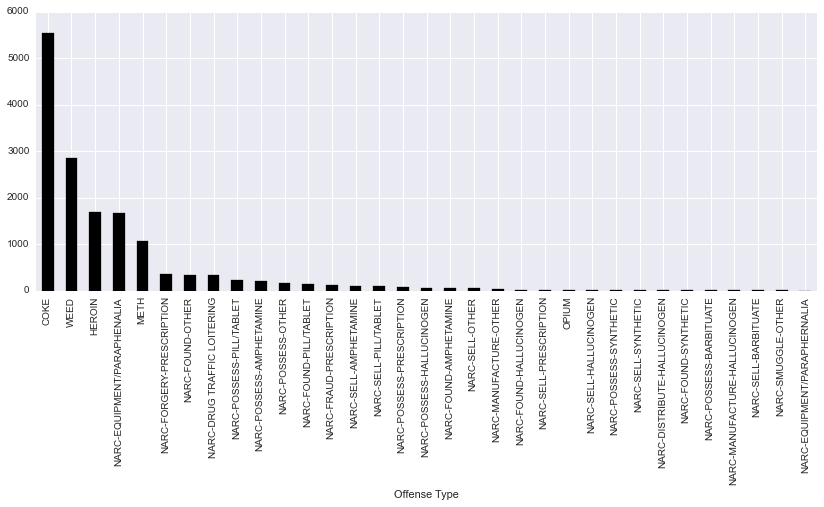

In [11]:
types=SeattleDrug.groupby('Offense Type').size()
types.sort(ascending=False)
types.plot(kind='bar',figsize=(14,5),color='k')

In [88]:
SeattleDrug.index=pd.DatetimeIndex(SeattleDrug['Date Reported'])
SeattleDrug['date']=SeattleDrug.index.date
SeattleDrug['year']=SeattleDrug.index.year
SeattleDrug['month']=SeattleDrug.index.month

coke_crime=SeattleDrug[SeattleDrug['Offense Type']=='COKE']
weed_crime=SeattleDrug[SeattleDrug['Offense Type']=='WEED']
meth_crime=SeattleDrug[SeattleDrug['Offense Type']=='METH']
her_crime=SeattleDrug[SeattleDrug['Offense Type']=='HEROIN']

In [38]:
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [90]:
print list(set(coke_crime['Year']))

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


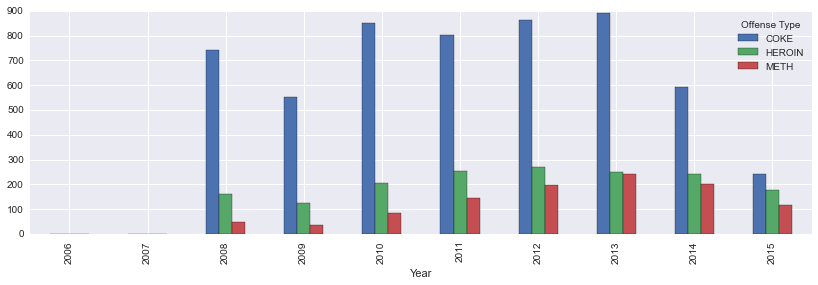

In [104]:
crime_by_year=SeattleDrug.groupby(['Year','Offense Type']).size().unstack().fillna(0)
crime_by_year[['COKE','HEROIN','METH']].plot(figsize=(14,4),kind='bar')

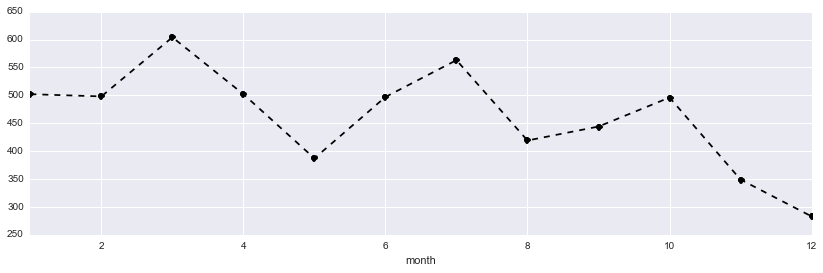

In [112]:
coke_crime=SeattleDrug[SeattleDrug['Offense Type']=='COKE']
coke_crime_by_day=coke_crime.groupby('month').size()
coke_crime_by_day.plot(figsize=(14,4),color='k',style='--o')

In [80]:
coke_pairs=coke_crime[['Latitude','Longitude']]
weed_pairs=weed_crime[['Latitude','Longitude']]
meth_pairs=meth_crime[['Latitude','Longitude']]
her_pairs=her_crime[['Latitude','Longitude']]

In [81]:
center = [pairs.Latitude.median(),pairs.Longitude.median()]
df_map = folium.Map(location=center,tiles='Mapbox',zoom_start=12,API_key='cray.16710dba',width=1060,height=1000)
for pair in coke_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'red', fill_color = 'red')
for pair in weed_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'green', fill_color = 'green')
for pair in meth_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'blue', fill_color = 'blue')
for pair in her_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'yellow', fill_color = 'yellow')

In [82]:
df_map.create_map()
embed_map(df_map)